In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import os

In [2]:
try:
    os.chdir('C:\\Users\\111\\OneDrive\\Python_machine_learning_book\\raw_data')
except:
    os.chdir('C:\\Users\\Li\\OneDrive\\Python_machine_learning_book\\raw_data')

In [3]:
col_names =pd.read_excel('Data_Dictionary.xlsx')
col_names =col_names.iloc[:,1]
print(col_names)

0                         ID
1                       FICO
2           Business Revenue
3                        TSR
4           Last 6M Avg Util
5                     Income
6          Last 6M Avg Remit
7            Last 6M Avg Bal
8           Internal Revolve
9     Lending AR% in last 6M
10           ExternalBalance
11        Months in Business
12      preferred_spend_line
13               total_cards
14        preferred_bal_line
15        preavgremit1_3_all
16         External_rev_rate
17       Supplementary Cards
18              isChargeCust
19                       CMV
20             Assigned Line
21                       NaN
22    Additional Definitions
23               Credit Line
24     Average Daily Balance
25                 External 
26               Charge Card
Name: Variable Name, dtype: object


In [4]:
df_1 =pd.read_csv('development_dataset.csv', names=col_names, low_memory=False, skiprows=1)
df_1.sample(10)

,ID,FICO,Business Revenue,TSR,Last 6M Avg Util,Income,Last 6M Avg Remit,Last 6M Avg Bal,Internal Revolve,Lending AR% in last 6M,...,Supplementary Cards,isChargeCust,CMV,Assigned Line,nan,Additional Definitions,Credit Line,Average Daily Balance,External,Charge Card
3134,3135,863.529412,1.000000,785.714286,611.574748,9.090909,NaN,NaN,22.086661,47.899686,...,0,0,88.834768,Medium,NaN,NaN,NaN,NaN,NaN,NaN
26584,26585,941.176471,0.027778,35.714286,631.108754,NaN,0.743910,198.483704,107.066619,58.632548,...,0,0,106.934596,Medium,NaN,NaN,NaN,NaN,NaN,NaN
10384,10385,936.470588,4.615556,71.428571,612.563878,0.545455,0.627918,197.077258,30.993194,58.632548,...,0,0,97.025818,Medium,NaN,NaN,NaN,NaN,NaN,NaN
16840,16841,878.823529,0.105344,35.714286,617.056104,NaN,3.441321,197.233049,1.907932,58.632548,...,0,0,416.070568,Low,NaN,NaN,NaN,NaN,NaN,NaN
11734,11735,969.411765,0.111111,NaN,624.711795,4.545455,0.610160,197.021453,143.030702,58.632548,...,0,0,117.507745,Low,NaN,NaN,NaN,NaN,NaN,NaN
29523,29524,961.176471,0.388889,NaN,619.904448,22.727364,1.574895,198.501775,NaN,53.084732,...,1,0,158.759036,Medium,NaN,NaN,NaN,NaN,NaN,NaN
26515,26516,909.411765,NaN,NaN,628.281417,9.090909,0.996807,197.786871,3.084347,58.632548,...,0,0,205.216868,Low,NaN,NaN,NaN,NaN,NaN,NaN
32768,32769,915.294118,0.061111,250.000000,671.531786,6.818182,5.230506,206.715138,NaN,58.632548,...,1,0,126.908778,Low,NaN,NaN,NaN,NaN,NaN,NaN
25625,25626,941.176471,0.833333,107.142857,618.826034,10.000000,0.639805,197.093715,NaN,58.632548,...,1,0,131.697074,Medium,NaN,NaN,NaN,NaN,NaN,NaN
4942,4943,987.058823,0.027778,NaN,643.801131,NaN,1.628177,199.162759,3.306796,58.205380,...,0,1,161.719449,High,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_1 = df_1.iloc[:, :21]
df_1.sample(10)

,ID,FICO,Business Revenue,TSR,Last 6M Avg Util,Income,Last 6M Avg Remit,Last 6M Avg Bal,Internal Revolve,Lending AR% in last 6M,...,Months in Business,preferred_spend_line,total_cards,preferred_bal_line,preavgremit1_3_all,External_rev_rate,Supplementary Cards,isChargeCust,CMV,Assigned Line
19618,19619,841.176471,NaN,NaN,660.458781,272.727273,0.725787,197.321202,77.900077,58.632548,...,NaN,NaN,1,NaN,1.122092,NaN,0,0,125.024096,Low
6128,6129,922.352941,0.111111,35.714286,611.574748,9.090909,1.016352,198.049098,22.086661,NaN,...,NaN,NaN,1,NaN,1.233903,NaN,0,1,158.356282,Medium
20362,20363,947.058823,0.166667,71.428571,647.188682,13.636364,1.138166,198.299955,NaN,58.632548,...,15.012510,16.666667,1,13.333333,1.436979,817.45,0,0,108.225473,Medium
25125,25126,889.411765,1.666667,321.428571,616.396100,11.363636,2.497628,200.907672,NaN,49.528935,...,210.175146,NaN,4,17.400000,2.832593,1000.00,0,1,136.734940,Low
1502,1503,927.058823,3.888889,535.714286,612.828229,9.090909,3.294273,202.536525,NaN,47.953351,...,130.108424,8.800000,3,8.800000,3.329720,70.60,0,1,477.600688,Medium
26421,26422,875.294118,0.388889,35.714286,672.321339,9.090909,2.771388,201.393826,NaN,58.632548,...,NaN,5.333333,1,5.333333,2.233049,NaN,0,0,275.313253,High
32708,32709,898.823529,0.277778,107.142857,611.511723,22.727273,0.699364,196.901826,205.004256,47.899686,...,NaN,16.666667,2,16.666667,0.959315,NaN,1,0,116.308090,Medium
23314,23315,900.000000,NaN,NaN,650.282121,6.590909,1.779453,199.863505,NaN,49.905658,...,NaN,NaN,3,NaN,2.104781,NaN,1,1,210.545611,Low
9857,9858,828.235294,0.138889,714.285714,640.145726,3.927273,0.845903,197.805734,NaN,58.632548,...,NaN,NaN,1,NaN,1.310783,NaN,0,0,130.328744,High
6133,6134,978.823529,0.006667,71.428571,611.574748,9.090909,NaN,NaN,NaN,47.899686,...,NaN,13.333333,.,13.333333,NaN,NaN,0,0,111.287436,High


In [6]:
missing =pd.DataFrame(df_1.isnull().sum().sort_values(ascending=False)/len(df_1), columns=['%missing'])
print(missing)
drop_missing =missing.nlargest(2, '%missing').index
missing[missing['%missing']<0.1].index

                        %missing
External_rev_rate       0.652765
Internal Revolve        0.465206
TSR                     0.367471
Months in Business      0.308882
preferred_spend_line    0.250647
preferred_bal_line      0.236000
ExternalBalance         0.222500
Lending AR% in last 6M  0.133824
Income                  0.102794
Business Revenue        0.099559
FICO                    0.028265
preavgremit1_3_all      0.025471
Last 6M Avg Bal         0.024559
Last 6M Avg Remit       0.024559
Last 6M Avg Util        0.000029
Assigned Line           0.000000
CMV                     0.000000
total_cards             0.000000
Supplementary Cards     0.000000
isChargeCust            0.000000
ID                      0.000000


Index(['Business Revenue', 'FICO', 'preavgremit1_3_all', 'Last 6M Avg Bal',
       'Last 6M Avg Remit', 'Last 6M Avg Util', 'Assigned Line', 'CMV',
       'total_cards', 'Supplementary Cards', 'isChargeCust', 'ID'],
      dtype='object')

In [7]:
df_2 =df_1.drop(drop_missing, axis=1)
print(df_1.shape, df_2.shape)

(34000, 21) (34000, 19)


In [8]:
print(df_2.columns)
print(df_2.isnull().sum().sort_values(ascending=False)/len(df_2))

Index(['ID', 'FICO', 'Business Revenue', 'TSR', 'Last 6M Avg Util', 'Income',
       'Last 6M Avg Remit', 'Last 6M Avg Bal', 'Lending AR% in last 6M',
       'ExternalBalance', 'Months in Business', 'preferred_spend_line',
       'total_cards', 'preferred_bal_line', 'preavgremit1_3_all',
       'Supplementary Cards', 'isChargeCust', 'CMV', 'Assigned Line'],
      dtype='object')
TSR                       0.367471
Months in Business        0.308882
preferred_spend_line      0.250647
preferred_bal_line        0.236000
ExternalBalance           0.222500
Lending AR% in last 6M    0.133824
Income                    0.102794
Business Revenue          0.099559
FICO                      0.028265
preavgremit1_3_all        0.025471
Last 6M Avg Bal           0.024559
Last 6M Avg Remit         0.024559
Last 6M Avg Util          0.000029
Assigned Line             0.000000
CMV                       0.000000
total_cards               0.000000
Supplementary Cards       0.000000
isChargeCust           

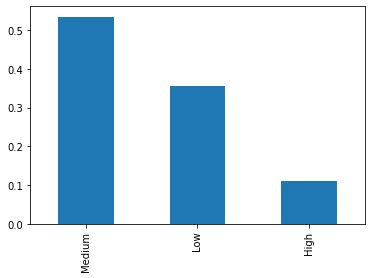

In [9]:
(df_2['Assigned Line'].value_counts()/len(df_2)).plot(kind='bar')

In [10]:
print('before drop columns with 10% or less data', df_2.shape)

before drop columns with 10% or less data (34000, 19)


In [11]:
for col_name in missing[missing['%missing']<0.1].index:
    df_2.drop(df_2[df_2[col_name].isnull()].index, axis=0, inplace=True)

print('after drop columns with 10% or less data', df_2.shape)

after drop columns with 10% or less data (29025, 19)


In [12]:
for columns in df_2.columns:
    print([columns, df_2[columns].dtype])

['ID', dtype('int64')]
['FICO', dtype('float64')]
['Business Revenue', dtype('float64')]
['TSR', dtype('float64')]
['Last 6M Avg Util', dtype('float64')]
['Income', dtype('float64')]
['Last 6M Avg Remit', dtype('float64')]
['Last 6M Avg Bal', dtype('float64')]
['Lending AR% in last 6M', dtype('float64')]
['ExternalBalance', dtype('float64')]
['Months in Business', dtype('float64')]
['preferred_spend_line', dtype('float64')]
['total_cards', dtype('O')]
['preferred_bal_line', dtype('float64')]
['preavgremit1_3_all', dtype('float64')]
['Supplementary Cards', dtype('int64')]
['isChargeCust', dtype('int64')]
['CMV', dtype('float64')]
['Assigned Line', dtype('O')]


In [13]:
df_2['total_cards'].unique()
df_3=df_2.dropna(axis=0)

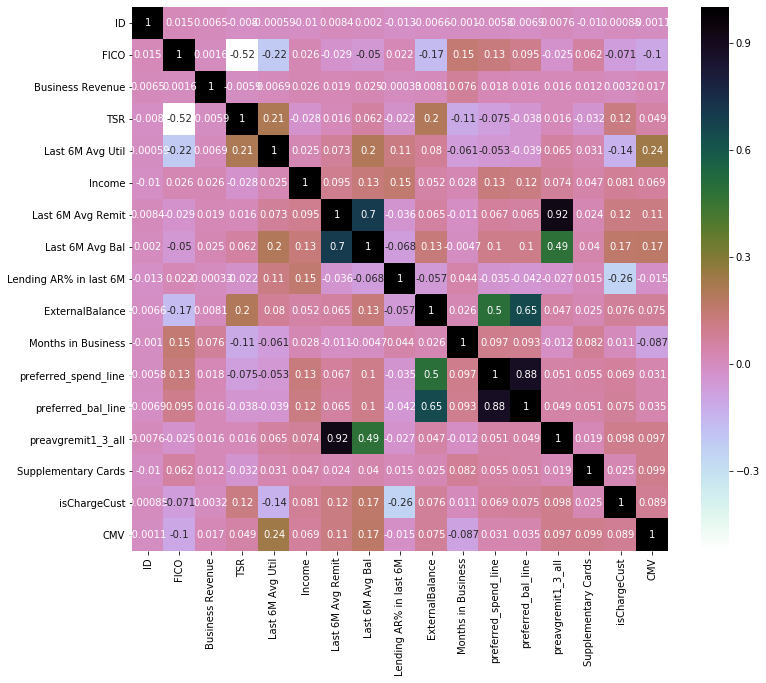

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df_2.corr(), annot=True, cmap='cubehelix_r')
plt.show()

#high correlation pair
#TSR-FICO
#isChargedcust-lending AR% in 6months
#preavgremit_3-last 6month avg remit

In [15]:
y_1 =np.array(df_3['TSR']).reshape(-1,1)
x_1 =np.array(df_3['FICO']).reshape(-1,1)
lin_reg =LinearRegression()
lin_reg.fit(x_1, y_1)
print(x_1.shape, y_1.shape)
print(lin_reg.coef_, lin_reg.intercept_)
print(lin_reg.score(x_1, y_1))

(8930, 1) (8930, 1)
[[-2.57888168]] [2579.57994947]
0.2796305444979529


In [16]:
for col2 in df_2.columns:
    print([col2, df_2[col2].dtype])

['ID', dtype('int64')]
['FICO', dtype('float64')]
['Business Revenue', dtype('float64')]
['TSR', dtype('float64')]
['Last 6M Avg Util', dtype('float64')]
['Income', dtype('float64')]
['Last 6M Avg Remit', dtype('float64')]
['Last 6M Avg Bal', dtype('float64')]
['Lending AR% in last 6M', dtype('float64')]
['ExternalBalance', dtype('float64')]
['Months in Business', dtype('float64')]
['preferred_spend_line', dtype('float64')]
['total_cards', dtype('O')]
['preferred_bal_line', dtype('float64')]
['preavgremit1_3_all', dtype('float64')]
['Supplementary Cards', dtype('int64')]
['isChargeCust', dtype('int64')]
['CMV', dtype('float64')]
['Assigned Line', dtype('O')]


In [17]:
# missing data handling

# fill TSR base on FICO
df_2['TSR'] =df_2['TSR'].fillna(df_2['FICO']*lin_reg.coef_[0]+lin_reg.intercept_[0])
df_2['TSR'].isnull().sum()

# Months in Business  no obvious trends, use simple techniques instead
df_2['Months in Business'] =df_2['Months in Business'].fillna(df_2['Months in Business'].median())

# preferred_spend_line & preferred_bal_line & ExternalBalance are highly correlated
df_2.drop(['ID','preferred_spend_line', 'preferred_bal_line', 'TSR', 'Last 6M Avg Remit', 'Last 6M Avg Remit'], axis=1, inplace=True)
df_2['ExternalBalance'] =df_2['ExternalBalance'].fillna(df_2['ExternalBalance'].mean())

# Lending AR% in last 6M (what is the domain knowledge on this topic?)
df_2['Lending AR% in last 6M'] =df_2['Lending AR% in last 6M'].fillna(df_2['Lending AR% in last 6M'].mean())

# income
df_2['Income'] =df_2['Income'].fillna(df_2['Income'].mean())

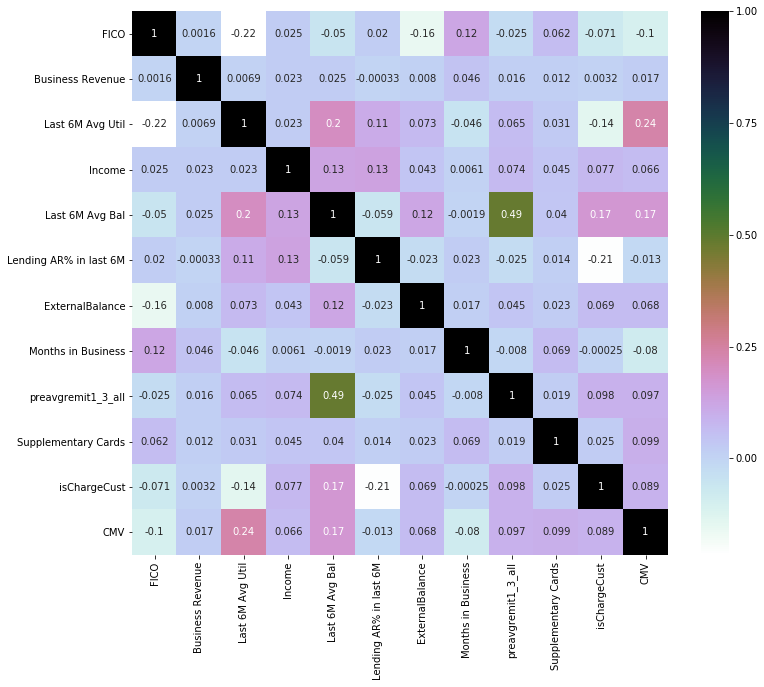

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(df_2.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [19]:
print(df_2.columns)
print(df_2.isnull().sum().sort_values(ascending=False)/len(df_2))

Index(['FICO', 'Business Revenue', 'Last 6M Avg Util', 'Income',
       'Last 6M Avg Bal', 'Lending AR% in last 6M', 'ExternalBalance',
       'Months in Business', 'total_cards', 'preavgremit1_3_all',
       'Supplementary Cards', 'isChargeCust', 'CMV', 'Assigned Line'],
      dtype='object')
Assigned Line             0.0
CMV                       0.0
isChargeCust              0.0
Supplementary Cards       0.0
preavgremit1_3_all        0.0
total_cards               0.0
Months in Business        0.0
ExternalBalance           0.0
Lending AR% in last 6M    0.0
Last 6M Avg Bal           0.0
Income                    0.0
Last 6M Avg Util          0.0
Business Revenue          0.0
FICO                      0.0
dtype: float64


In [20]:
#feature selection

df_2['total_cards'].replace({'.':0}, inplace=True)
df_2['total_cards'] =df_2['total_cards'].astype('float64')

In [21]:
for col2 in df_2.columns:
    print([col2, df_2[col2].dtype])

['FICO', dtype('float64')]
['Business Revenue', dtype('float64')]
['Last 6M Avg Util', dtype('float64')]
['Income', dtype('float64')]
['Last 6M Avg Bal', dtype('float64')]
['Lending AR% in last 6M', dtype('float64')]
['ExternalBalance', dtype('float64')]
['Months in Business', dtype('float64')]
['total_cards', dtype('float64')]
['preavgremit1_3_all', dtype('float64')]
['Supplementary Cards', dtype('int64')]
['isChargeCust', dtype('int64')]
['CMV', dtype('float64')]
['Assigned Line', dtype('O')]


In [22]:
df_2['Assigned Line'].unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [23]:
df_var=df_2.drop(['Assigned Line'],axis=1)
df_target =df_2['Assigned Line'].replace({'Low':1, 'Medium':10, 'High':1000})
df_3 =df_2
df_3['Assigned Line'] =df_2['Assigned Line'].replace({'Low':1, 'Medium':2, 'High':3}).astype('float64')
print(df_var.shape, df_target.shape)

(29025, 13) (29025,)


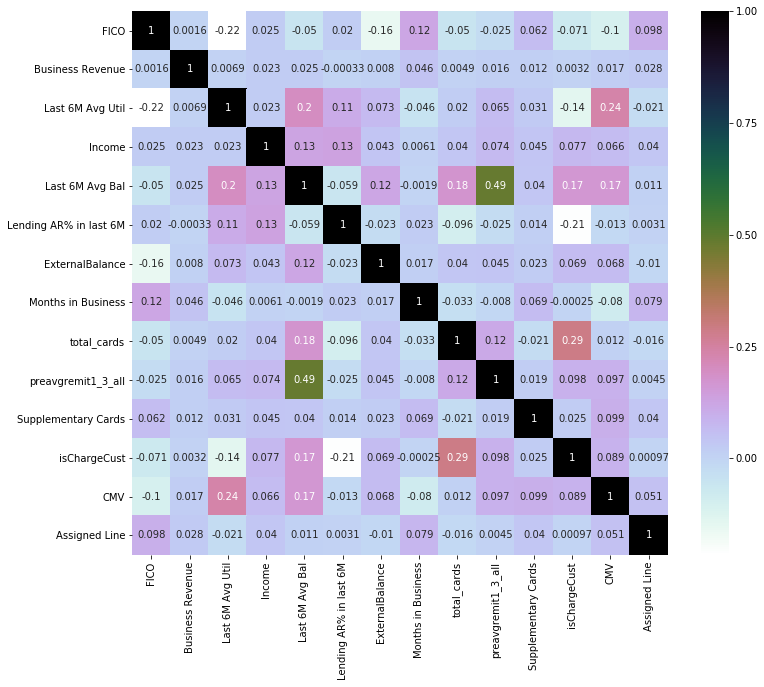

In [24]:
plt.figure(figsize=(12,10))
sns.heatmap(df_3.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [25]:
# split data for testing

x_train, x_test, y_train, y_test =train_test_split(df_var, df_target, train_size=0.75, random_state=2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(21768, 13) (7257, 13) (21768,) (7257,)


In [26]:
# standardize

from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
scaler.fit(x_train)
scaler.transform(x_train)
scaler.transform(x_test)


array([[-7.73983039e-02, -5.14548584e-04,  6.47090990e-01, ...,
        -5.77192227e-01,  1.48046913e+00, -3.81535267e-01],
       [-1.47516762e-01, -8.08615635e-02, -4.95317820e-01, ...,
         2.32550395e+00, -6.75461566e-01, -4.27811079e-01],
       [-1.08242953e+00, -5.95932360e-02, -5.82892513e-01, ...,
         8.74155860e-01, -6.75461566e-01, -7.22624709e-01],
       ...,
       [-3.57872135e-01, -5.95932360e-02, -6.61038643e-01, ...,
        -5.77192227e-01,  1.48046913e+00, -4.38022365e-01],
       [-9.88938253e-01, -8.55878586e-02, -5.48117761e-01, ...,
         8.74155860e-01, -6.75461566e-01, -4.85110748e-01],
       [ 1.20810675e+00, -7.61352686e-02,  1.25324640e-04, ...,
         2.32550395e+00, -6.75461566e-01, -4.64566291e-01]])

In [27]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error


In [28]:
forest_clf =RandomForestClassifier()
forest_clf.fit(x_train, y_train)
forest_y_pred =forest_clf.predict(x_test)
score =mean_squared_error(forest_y_pred, y_test)
print(score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


127713.43778420835


In [29]:
log_reg =LogisticRegression()
log_reg.fit(x_train, y_train)
log_y_pred =log_reg.predict(x_test)
log_score =mean_squared_error(log_y_pred, y_test)
print(log_score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


117101.1988424969


In [30]:
# baseline, what if I assign everyone medium score
y_base_1 =y_test[y_test==1]
y_base_2 =y_test[y_test==10]
y_base_3 =y_test[y_test==1000]
print(len(y_base_1)/len(y_test), len(y_base_2)/len(y_test), len(y_base_3)/len(y_test))

0.3427035965274907 0.5385145376877497 0.11878186578475955


In [34]:
print(np.unique(forest_y_pred, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([   1,   10, 1000], dtype=int64), array([2467, 4598,  192], dtype=int64))
(array([   1,   10, 1000], dtype=int64), array([2487, 3908,  862], dtype=int64))


In [35]:
print(np.unique(log_y_pred, return_counts=True))
print(np.unique(y_test, return_counts=True))


(array([   1,   10, 1000], dtype=int64), array([ 853, 6399,    5], dtype=int64))
(array([   1,   10, 1000], dtype=int64), array([2487, 3908,  862], dtype=int64))


In [36]:
from sklearn.metrics import accuracy_score

forest_score =accuracy_score(y_test, forest_y_pred)
print(forest_score)

log_reg_score =accuracy_score(y_test, log_y_pred)
print(log_reg_score)


0.5203252032520326
0.5558770841945707


In [37]:
from sklearn.metrics import confusion_matrix

print('random forest', confusion_matrix(y_test, forest_y_pred))
print('LR', confusion_matrix(y_test, log_y_pred))

random forest [[1058 1383   46]
 [1158 2661   89]
 [ 251  554   57]]
LR [[ 440 2044    3]
 [ 314 3593    1]
 [  99  762    1]]
